In [1]:
from qiskit.circuit import QuantumCircuit
J = 1
n = 4
circ = QuantumCircuit(n)

In [2]:
from qiskit.quantum_info import SparsePauliOp
Hlist = []
for i in range(n - 1):
    Hlist.append(("XX", [i, i + 1], J))
    Hlist.append(("YY", [i, i + 1], J))
    Hlist.append(("ZZ", [i, i + 1], J))
H = SparsePauliOp.from_sparse_list(Hlist, num_qubits = n)
H

SparsePauliOp(['IIXX', 'IIYY', 'IIZZ', 'IXXI', 'IYYI', 'IZZI', 'XXII', 'YYII', 'ZZII'],
              coeffs=[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j])

In [3]:
from qiskit.circuit import Parameter
import numpy as np

def N(temp, c, i):
    p = Parameter(f'p{c}')
    temp.rz(np.pi / 2, i + 1)
    temp.cx(i + 1, i)
    temp.rz(2 * p - np.pi / 2, i)
    temp.ry(-2 * p + np.pi / 2, i + 1)
    temp.cx(i, i + 1)
    temp.ry(2 * p - np.pi / 2, i + 1)
    temp.cx(i + 1, i)
    temp.rz(-np.pi / 2, i)
    return temp

In [4]:
ansatz = QuantumCircuit(n)
for i in range(0, n, 2):
    ansatz.x(i)
    ansatz.x(i + 1)
    ansatz.h(i)
    ansatz.cx(i, i + 1)
ansatz.draw()

┌───┐┌───┐     
q_0: ┤ X ├┤ H ├──■──
     ├───┤└───┘┌─┴─┐
q_1: ┤ X ├─────┤ X ├
     ├───┤┌───┐└───┘
q_2: ┤ X ├┤ H ├──■──
     ├───┤└───┘┌─┴─┐
q_3: ┤ X ├─────┤ X ├
     └───┘     └───┘

In [5]:
m = 10
count = 1

for j in range(m):
    for i in range(0, n - 1, 2):
        ansatz = N(ansatz, count, i)
        count += 1
    for i in range(1, n - 1, 2):
        ansatz = N(ansatz, count, i)
        count += 1

ansatz.draw()

┌───┐┌───┐                ┌───┐┌────────────────┐                       »
q_0: ┤ X ├┤ H ├──■─────────────┤ X ├┤ Rz(2*p1 - π/2) ├──■────────────────────»
     ├───┤└───┘┌─┴─┐┌─────────┐└─┬─┘├────────────────┤┌─┴─┐┌────────────────┐»
q_1: ┤ X ├─────┤ X ├┤ Rz(π/2) ├──■──┤ Ry(π/2 - 2*p1) ├┤ X ├┤ Ry(2*p1 - π/2) ├»
     ├───┤┌───┐└───┘└─────────┘┌───┐├────────────────┤└───┘└────────────────┘»
q_2: ┤ X ├┤ H ├──■─────────────┤ X ├┤ Rz(2*p2 - π/2) ├──■────────────────────»
     ├───┤└───┘┌─┴─┐┌─────────┐└─┬─┘├────────────────┤┌─┴─┐┌────────────────┐»
q_3: ┤ X ├─────┤ X ├┤ Rz(π/2) ├──■──┤ Ry(π/2 - 2*p2) ├┤ X ├┤ Ry(2*p2 - π/2) ├»
     └───┘     └───┘└─────────┘     └────────────────┘└───┘└────────────────┘»
«     ┌───┐┌──────────┐                                       »
«q_0: ┤ X ├┤ Rz(-π/2) ├───────────────────────────────────────»
«     └─┬─┘└──────────┘           ┌───┐┌────────────────┐     »
«q_1: ──■─────────────────────────┤ X ├┤ Rz(2*p3 - π/2) ├──■──»
«     ┌───┐┌──────────┐┌─────────┐└─┬─┘├────────────────┤┌─┴─┐»
«q_2: ┤ X ├┤ Rz(-π/2) ├┤ Rz(π/2) ├──■──┤ Ry(π/2 - 2*p3) ├┤ X ├»
«     └─┬─┘├─────────┬┘└─────────┘     └────────────────┘└───┘»
«q_3: ──■──┤ Rz(π/2) ├────────────────────────────────────────»
«          └─────────┘                                        »
«                                                          ┌───┐»
«q_0: ─────────────────────────────────────────────────────┤ X ├»
«                       ┌───┐┌──────────┐   ┌─────────┐    └─┬─┘»
«q_1: ──────────────────┤ X ├┤ Rz(-π/2) ├───┤ Rz(π/2) ├──────■──»
«     ┌────────────────┐└─┬─┘└──┬───┬───┘┌──┴─────────┴───┐     »
«q_2: ┤ Ry(2*p3 - π/2) ├──■─────┤ X ├────┤ Rz(2*p5 - π/2) ├──■──»
«     └────────────────┘        └─┬─┘    ├────────────────┤┌─┴─┐»
«q_3: ────────────────────────────■──────┤ Ry(π/2 - 2*p5) ├┤ X ├»
«                                        └────────────────┘└───┘»
«     ┌────────────────┐                          ┌───┐   ┌──────────┐»
«q_0: ┤ Rz(2*p4 - π/2) ├──■───────────────────────┤ X ├───┤ Rz(-π/2) ├»
«     ├────────────────┤┌─┴─┐┌────────────────┐   └─┬─┘   └──┬───┬───┘»
«q_1: ┤ Ry(π/2 - 2*p4) ├┤ X ├┤ Ry(2*p4 - π/2) ├─────■────────┤ X ├────»
«     └────────────────┘├───┤└──┬──────────┬──┘┌─────────┐   └─┬─┘    »
«q_2: ──────────────────┤ X ├───┤ Rz(-π/2) ├───┤ Rz(π/2) ├─────■──────»
«     ┌────────────────┐└─┬─┘   ├─────────┬┘   └─────────┘            »
«q_3: ┤ Ry(2*p5 - π/2) ├──■─────┤ Rz(π/2) ├───────────────────────────»
«     └────────────────┘        └─────────┘                           »
«                                                               »
«q_0: ──────────────────────────────────────────────────────────»
«     ┌────────────────┐                       ┌───┐┌──────────┐»
«q_1: ┤ Rz(2*p6 - π/2) ├──■────────────────────┤ X ├┤ Rz(-π/2) ├»
«     ├────────────────┤┌─┴─┐┌────────────────┐└─┬─┘└──┬───┬───┘»
«q_2: ┤ Ry(π/2 - 2*p6) ├┤ X ├┤ Ry(2*p6 - π/2) ├──■─────┤ X ├────»
«     └────────────────┘└───┘└────────────────┘        └─┬─┘    »
«q_3: ───────────────────────────────────────────────────■──────»
«                                                               »
«                       ┌───┐┌────────────────┐                       »
«q_0: ──────────────────┤ X ├┤ Rz(2*p7 - π/2) ├──■────────────────────»
«        ┌─────────┐    └─┬─┘├────────────────┤┌─┴─┐┌────────────────┐»
«q_1: ───┤ Rz(π/2) ├──────■──┤ Ry(π/2 - 2*p7) ├┤ X ├┤ Ry(2*p7 - π/2) ├»
«     ┌──┴─────────┴───┐     └────────────────┘├───┤└──┬──────────┬──┘»
«q_2: ┤ Rz(2*p8 - π/2) ├──■────────────────────┤ X ├───┤ Rz(-π/2) ├───»
«     ├────────────────┤┌─┴─┐┌────────────────┐└─┬─┘   ├─────────┬┘   »
«q_3: ┤ Ry(π/2 - 2*p8) ├┤ X ├┤ Ry(2*p8 - π/2) ├──■─────┤ Rz(π/2) ├────»
«     └────────────────┘└───┘└────────────────┘        └─────────┘    »
«        ┌───┐   ┌──────────┐                                              »
«q_0: ───┤ X ├───┤ Rz(-π/2) ├──────────────────────────────────────────────»
«        └─┬─┘   └──┬───┬───┘┌────────────────┐                       ┌───┐»
«q_

In [6]:
num_params = ansatz.num_parameters
num_params

30

In [7]:
from qiskit_algorithms import NumPyMinimumEigensolver

numpy_solver = NumPyMinimumEigensolver()
result = numpy_solver.compute_minimum_eigenvalue(operator = H)
ref_value = result.eigenvalue.real
print(f"Reference value: {ref_value:.5f}")

Reference value: -6.46410


VQE: -6.46405
Exact: 0.00005


Text(0.5, 1.0, 'Convergence with no noise')

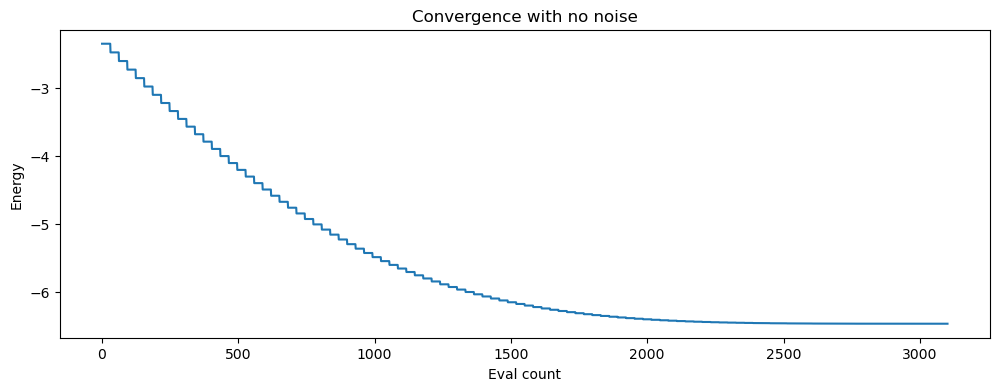

In [8]:
from qiskit_algorithms.optimizers import ADAM

iterations = 100
adam = ADAM(maxiter=iterations)

counts = []
values = []

def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)
    
from qiskit.utils import algorithm_globals
from qiskit.primitives import Estimator

seed = 170
algorithm_globals.random_seed = seed

estimator = Estimator()

from qiskit_algorithms.minimum_eigensolvers import VQE

vqe = VQE(estimator, ansatz, optimizer = adam, callback = store_intermediate_result)

result = vqe.compute_minimum_eigenvalue(operator = H)

print(f"VQE: {result.eigenvalue.real:.5f}")
print(f"Exact: {(result.eigenvalue.real - ref_value):.5f}")

import pylab

pylab.rcParams["figure.figsize"] = (12, 4)
pylab.plot(counts, values)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.title("Convergence with no noise")